# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

### Solution ###

In [1]:
import math
import zipfile
from PIL import Image, ImageOps, ImageDraw
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# the rest is up to you!

In [2]:
parsed_image = {}  
#Step 1: iterate through the zip file and save all the binarized versions to parsed_image -> 
with zipfile.ZipFile('readonly/images.zip', 'r') as archive:
    for entry in archive.infolist():
        with archive.open(entry) as file:
            img = Image.open(file).convert('RGB')
            parsed_image[entry.filename] = {'pil_img':img}

In [3]:
parsed_image

{'a-0.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7F7581D75F28>},
 'a-1.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7F7581DFE6A0>},
 'a-10.png': {'pil_img': <PIL.Image.Image image mode=RGB size=6300x3600 at 0x7F7581D02FD0>},
 'a-11.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3150x3600 at 0x7F7581D02A20>},
 'a-12.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3150x3600 at 0x7F7581DFE748>},
 'a-13.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3150x3600 at 0x7F7581D0C4E0>},
 'a-2.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7F7581D0C550>},
 'a-3.png': {'pil_img': <PIL.Image.Image image mode=RGB size=7200x6300 at 0x7F7581D0C5C0>},
 'a-4.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7F7581D0C630>},
 'a-5.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7F7581D0C6A0>},
 'a-6.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x

In [4]:
#Step 2: parse all images text -> 
for img_name in parsed_image.keys():
    text = pytesseract.image_to_string(parsed_image[img_name]['pil_img'])
    parsed_image[img_name]['text'] = text

In [5]:
parsed_image

{'a-0.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7F7581D75F28>,
  'text': "Che Michigan Daily\n\nAnn Arbor, Michigan\n\nWednesday, November 5, 2014\n\nmichigandaily.com\n\nBIG DAY FOR REPUBLICANS\n\nSNYDER EARNS SECOND TERM; G.O.P. TAKES CONTROL OF U.S. SENATE\n\nSTATE\n\nEXECUTIVE\nGOVERNOR\nRick Snyder (R)\n\nLIEUTENANT\nGOVERNOR\nBrian Calley (R)\n\nSECRETARY OF\nSTATE\nRuth Johnson CR)\n\nSTATE\nJUDICIAL\n\nATTORNEY GENERAL\nBill Schuette CR)\n\nMICHIGAN\nLEGISLATIVE\n\nMICHIGAN STATE\nSENATE\nRebekah Warren (D)\n\nMICHIGAN HOUSE\nOF REPRESENTATIVES\nJeff Irwin CD)\n\nU.S.\nLEGISLATIVE\n\nU.S. SENATE\nGary Peters (D)\n\nU.S. HOUSE OF\nREPRESENTATIVES\nDebbie Dingell (D)\n\nWASHTENAW\nCOUNTY\n\nPROBATE COURT\nJulia Owdziej (D)\n\nCIRCUIT COURT\nPatrick Conlin (D)\n\nANN ARBOR\nMAYOR\nChristopher Taylor (D)\n\nCITY COUNCIL\n\nSumi Kailasapathy (D)\nChuck Warpehoski (D)\nJulie Grand (D)\nGraydon Kraphol (D)\nKirk Westphal (D)\n\nREGENTS\n\nToo close to call\

In [6]:
#Step 3: find the bounding boxes for all the faces from every page and extract them ->
for img_name in parsed_image.keys():
    open_cv_image = np.array(parsed_image[img_name]['pil_img']) 
    img_g = cv.cvtColor(open_cv_image, cv.COLOR_BGR2GRAY)
    faces_bounding_boxes = face_cascade.detectMultiScale(img_g, 1.3, 5)
    parsed_image[img_name]['faces'] = []
    for x,y,w,h in faces_bounding_boxes:
        face = parsed_image[img_name]['pil_img'].crop((x,y,x+w,y+h))
        parsed_image[img_name]['faces'].append(face)

In [7]:
parsed_image

{'a-0.png': {'pil_img': <PIL.Image.Image image mode=RGB size=3600x6300 at 0x7F7581D75F28>,
  'text': "Che Michigan Daily\n\nAnn Arbor, Michigan\n\nWednesday, November 5, 2014\n\nmichigandaily.com\n\nBIG DAY FOR REPUBLICANS\n\nSNYDER EARNS SECOND TERM; G.O.P. TAKES CONTROL OF U.S. SENATE\n\nSTATE\n\nEXECUTIVE\nGOVERNOR\nRick Snyder (R)\n\nLIEUTENANT\nGOVERNOR\nBrian Calley (R)\n\nSECRETARY OF\nSTATE\nRuth Johnson CR)\n\nSTATE\nJUDICIAL\n\nATTORNEY GENERAL\nBill Schuette CR)\n\nMICHIGAN\nLEGISLATIVE\n\nMICHIGAN STATE\nSENATE\nRebekah Warren (D)\n\nMICHIGAN HOUSE\nOF REPRESENTATIVES\nJeff Irwin CD)\n\nU.S.\nLEGISLATIVE\n\nU.S. SENATE\nGary Peters (D)\n\nU.S. HOUSE OF\nREPRESENTATIVES\nDebbie Dingell (D)\n\nWASHTENAW\nCOUNTY\n\nPROBATE COURT\nJulia Owdziej (D)\n\nCIRCUIT COURT\nPatrick Conlin (D)\n\nANN ARBOR\nMAYOR\nChristopher Taylor (D)\n\nCITY COUNCIL\n\nSumi Kailasapathy (D)\nChuck Warpehoski (D)\nJulie Grand (D)\nGraydon Kraphol (D)\nKirk Westphal (D)\n\nREGENTS\n\nToo close to call\

In [8]:
#Step 4: create thumbnails ->
for img_name in parsed_image.keys():
    for face in parsed_image[img_name]['faces']:
        face.thumbnail((100,100),Image.ANTIALIAS)

In [9]:
#Step 5: search the keyword in every page's text and return the faces ->
def search(keyword):
    for img_name in parsed_image:
        if (keyword in parsed_image[img_name]['text']):
            if(len(parsed_image[img_name]['faces']) != 0):
                print("Result found in file {}".format(img_name))
                h = math.ceil(len(parsed_image[img_name]['faces'])/5)
                contact_sheet=Image.new('RGB',(500, 100*h))
                xc = 0
                yc = 0
                for img in parsed_image[img_name]['faces']:
                    contact_sheet.paste(img, (xc, yc))
                    if xc + 100 == contact_sheet.width:
                        xc = 0
                        yc += 100
                    else:
                        xc += 100
                        
                display(contact_sheet)
            else:
                print("Result found in file {} \nBut, there were no faces in that file !\n\n".format(img_name))
    return          

Result found in file a-0.png


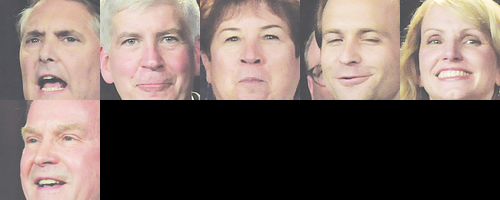

Result found in file a-3.png


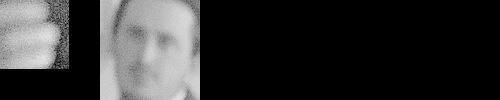

In [10]:
search('Christopher')

Result found in file a-0.png


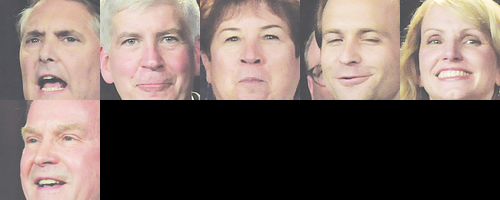

Result found in file a-1.png


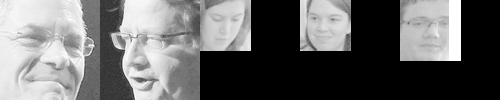

Result found in file a-10.png 
But, there were no faces in that file !


Result found in file a-13.png


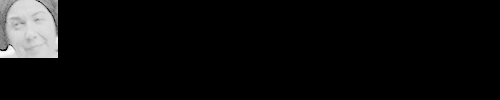

Result found in file a-2.png


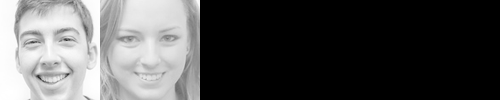

Result found in file a-3.png


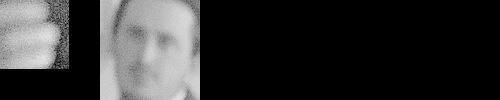

Result found in file a-8.png 
But, there were no faces in that file !




In [11]:
search('Mark')